In [243]:
# convert data to pandas dataframe
import pandas as pd
import numpy as np
import json

In [244]:
aspargus = '#678d58'
metal = '#242f40'
jordy = '#98b9f2'

In [245]:
def create_timeline(file_paths, names):
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Define the colors
    colors = ['b', 'g', 'r', 'c', 'm', 'k', 'limegreen', 'orange', 'purple', 'olive', 'teal', 'deepskyblue', 'darkviolet', 'sienna', 'rosybrown', 'gold', 'dodgerblue', 'lightcoral', 'darkslategray']

    # Loop through each file, read the data, extract the metrics, and plot
    for i, path in enumerate(file_paths):
        with open(path, 'r') as file:
            data = json.load(file)

            # Initialize lists to hold epochs and eval_accuracies
            epochs = []
            eval_accuracies = []

            # Extract epochs and eval_label_accuracy
            for entry in data['log_history']:
                if 'epoch' in entry and 'eval_label_accuracy' in entry:
                    epochs.append(entry['epoch'])
                    eval_accuracies.append(entry['eval_label_accuracy'])
                elif 'epoch' in entry and 'eval_exact_match_accuracy' in entry:
                    epochs.append(entry['epoch'])
                    eval_accuracies.append(entry['eval_exact_match_accuracy'])

            # Plot if we have the data
            if epochs and eval_accuracies:
                plt.plot(epochs, eval_accuracies, label=names[i], color=colors[i])
    plt.ylim(0.3, 0.5)
    plt.xlabel('Epoch')
    plt.ylabel('Evaluation Accuracy')
    plt.title('Evaluation Accuracy Over Time')
    plt.legend()
    plt.show()


In [246]:
def create_timeline_mean_and_std_shaded(file_paths):
    fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size and get the axes object

    # Initialize a dictionary to hold lists of accuracies for each epoch for the averaging
    accuracies_by_epoch = {}

    # Loop through each file, read the data, extract the metrics
    for i, path in enumerate(file_paths):
        with open(path, 'r') as file:
            data = json.load(file)

            # Extract epochs and eval_label_accuracy or eval_exact_match_accuracy
            for entry in data['log_history']:
                if 'epoch' in entry and ('eval_label_accuracy' in entry or 'eval_exact_match_accuracy' in entry):
                    epoch = entry['epoch']
                    accuracy = entry.get('eval_label_accuracy', entry.get('eval_exact_match_accuracy'))

                    # Add to the accuracies_by_epoch for averaging
                    if epoch not in accuracies_by_epoch:
                        accuracies_by_epoch[epoch] = []
                    accuracies_by_epoch[epoch].append(accuracy)

    # Calculate average accuracies and standard deviation for each epoch
    if accuracies_by_epoch:
        epochs = sorted(accuracies_by_epoch.keys())
        avg_accuracies = [np.mean(accuracies_by_epoch[epoch]) for epoch in epochs]
        std_devs = [np.std(accuracies_by_epoch[epoch]) for epoch in epochs]

        # Convert standard deviations to upper and lower bounds for the shaded area
        std_upper = [avg + std for avg, std in zip(avg_accuracies, std_devs)]
        std_lower = [avg - std for avg, std in zip(avg_accuracies, std_devs)]

        # Plot the average accuracy line
        plt.plot(epochs, avg_accuracies, label='Average Accuracy', color=aspargus)

        # Add shaded area for standard deviation
        plt.fill_between(epochs, std_lower, std_upper, color=aspargus, alpha=0.5, label='STD')
    # add horizontal line for at 0.33 with label random 
    plt.axhline(y=0.33, color='k', linestyle='--', label='Random')

    
    plt.ylim(0.3, 0.5)  # Adjust as needed
    plt.xlabel('Epoch')
    plt.ylabel('Evaluation Accuracy')
    plt.title('Evaluation Accuracy Over Time')
    plt.legend()
    plt.show()

In [247]:
def create_timeline_mean_and_std_shaded(file_paths):
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Initialize a dictionary to hold lists of accuracies for each epoch for the averaging
    accuracies_by_epoch = {}

    # Loop through each file, read the data, extract the metrics
    for i, path in enumerate(file_paths):
        with open(path, 'r') as file:
            data = json.load(file)

            # Extract epochs and eval_label_accuracy or eval_exact_match_accuracy
            for entry in data['log_history']:
                if 'epoch' in entry and ('eval_label_accuracy' in entry or 'eval_exact_match_accuracy' in entry):
                    epoch = entry['epoch']
                    accuracy = entry.get('eval_label_accuracy', entry.get('eval_exact_match_accuracy'))

                    # Add to the accuracies_by_epoch for averaging
                    if epoch not in accuracies_by_epoch:
                        accuracies_by_epoch[epoch] = []
                    accuracies_by_epoch[epoch].append(accuracy)

    # Calculate average accuracies and standard deviation for each epoch
    if accuracies_by_epoch:
        epochs = sorted(accuracies_by_epoch.keys())
        avg_accuracies = [np.mean(accuracies_by_epoch[epoch]) for epoch in epochs]
        std_devs = [np.std(accuracies_by_epoch[epoch]) for epoch in epochs]

        # Convert standard deviations to upper and lower bounds for the shaded area
        std_upper = [avg + std for avg, std in zip(avg_accuracies, std_devs)]
        std_lower = [avg - std for avg, std in zip(avg_accuracies, std_devs)]

        # Plot the average accuracy line
        plt.plot(epochs, avg_accuracies, label='Average Accuracy', color=aspargus)

        # Add shaded area for standard deviation
        plt.fill_between(epochs, std_lower, std_upper, color=aspargus, alpha=0.5, label='STD')
    # add horizontal line for at 0.33 with label random 
    plt.axhline(y=0.33, color='k', linestyle='--', label='Random')

    
    plt.ylim(0.3, 0.5)  # Adjust as needed
    plt.xlabel('Epoch')
    plt.ylabel('Evaluation Accuracy')
    plt.title('Evaluation Accuracy Over Time')
    plt.legend()
    plt.show()

In [248]:
def create_timeline_mean_and_std_shaded_with_baseline(file_paths_list1, file_paths_list2, name):
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Initialize dictionaries to hold lists of accuracies for each epoch for the averaging
    accuracies_by_epoch1 = {}
    accuracies_by_epoch2 = {}

    # Loop through each file in file_paths_list1, read the data, extract the metrics
    for i, path in enumerate(file_paths_list1):
        with open(path, 'r') as file:
            data = json.load(file)

            # Extract epochs and eval_label_accuracy or eval_exact_match_accuracy
            for entry in data['log_history']:
                if 'epoch' in entry and ('eval_label_accuracy' in entry or 'eval_exact_match_accuracy' in entry):
                    epoch = entry['epoch']
                    accuracy = entry.get('eval_label_accuracy', entry.get('eval_exact_match_accuracy'))

                    # Add to the accuracies_by_epoch for averaging
                    if epoch not in accuracies_by_epoch1:
                        accuracies_by_epoch1[epoch] = []
                    accuracies_by_epoch1[epoch].append(accuracy)

    # Loop through each file in file_paths_list2, read the data, extract the metrics
    for i, path in enumerate(file_paths_list2):
        with open(path, 'r') as file:
            data = json.load(file)

            # Extract epochs and eval_label_accuracy or eval_exact_match_accuracy
            for entry in data['log_history']:
                if 'epoch' in entry and ('eval_label_accuracy' in entry or 'eval_exact_match_accuracy' in entry):
                    epoch = entry['epoch']
                    accuracy = entry.get('eval_label_accuracy', entry.get('eval_exact_match_accuracy'))

                    # Add to the accuracies_by_epoch for averaging
                    if epoch not in accuracies_by_epoch2:
                        accuracies_by_epoch2[epoch] = []
                    accuracies_by_epoch2[epoch].append(accuracy)

    # Calculate average accuracies and standard deviation for each epoch for file_paths_list1
    if accuracies_by_epoch1:
        epochs1 = sorted(accuracies_by_epoch1.keys())
        avg_accuracies1 = [np.mean(accuracies_by_epoch1[epoch]) for epoch in epochs1]
        std_devs1 = [np.std(accuracies_by_epoch1[epoch]) for epoch in epochs1]

        # Convert standard deviations to upper and lower bounds for the shaded area
        std_upper1 = [avg + std for avg, std in zip(avg_accuracies1, std_devs1)]
        std_lower1 = [avg - std for avg, std in zip(avg_accuracies1, std_devs1)]

        # Plot the average accuracy line for file_paths_list1
        plt.plot(epochs1, avg_accuracies1, label='Average Accuracy Baseline', color=metal)

        # Add shaded area for standard deviation for file_paths_list1
        plt.fill_between(epochs1, std_lower1, std_upper1, color=metal, alpha=0.5, label=f"STD Baseline")

    # Calculate average accuracies and standard deviation for each epoch for file_paths_list2
    if accuracies_by_epoch2:
        epochs2 = sorted(accuracies_by_epoch2.keys())
        avg_accuracies2 = [np.mean(accuracies_by_epoch2[epoch]) for epoch in epochs2]
        std_devs2 = [np.std(accuracies_by_epoch2[epoch]) for epoch in epochs2]

        # Convert standard deviations to upper and lower bounds for the shaded area
        std_upper2 = [avg + std for avg, std in zip(avg_accuracies2, std_devs2)]
        std_lower2 = [avg - std for avg, std in zip(avg_accuracies2, std_devs2)]

        # Plot the average accuracy line for file_paths_list2
        plt.plot(epochs2, avg_accuracies2, label=f"Average Accuracy {name}", color=aspargus)

        # Add shaded area for standard deviation for file_paths_list2
        plt.fill_between(epochs2, std_lower2, std_upper2, color=aspargus, alpha=0.5, label=f"STD {name}")

    # add horizontal line for at 0.33 with label random
    plt.axhline(y=0.33, color=metal, linestyle='--', label='Random')

    plt.ylim(0.3, 0.5)  # Adjust as needed
    plt.xlabel('Epoch', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.ylabel('Evaluation Accuracy', fontsize=18)
    plt.title('Evaluation Accuracy Over Time', fontsize=20)
    plt.legend(fontsize=14, loc='upper left')
    plt.show()

In [249]:
def create_timeline_bleu_mean_and_std_shaded(file_paths):
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Initialize a dictionary to hold lists of accuracies for each epoch for the averaging
    accuracies_by_epoch = {}

    # Loop through each file, read the data, extract the metrics
    for i, path in enumerate(file_paths):
        with open(path, 'r') as file:
            data = json.load(file)

            # Extract epochs and eval_rationale_bleu_score
            for entry in data['log_history']:
                if 'epoch' in entry and 'eval_rationale_bleu_score' in entry:
                    epoch = entry['epoch']
                    accuracy = entry['eval_rationale_bleu_score']

                    # Add to the accuracies_by_epoch for averaging
                    if epoch not in accuracies_by_epoch:
                        accuracies_by_epoch[epoch] = []
                    accuracies_by_epoch[epoch].append(accuracy)

    # Calculate average accuracies and standard deviation for each epoch
    if accuracies_by_epoch:
        epochs = sorted(accuracies_by_epoch.keys())
        avg_accuracies = [np.mean(accuracies_by_epoch[epoch]) for epoch in epochs]
        std_devs = [np.std(accuracies_by_epoch[epoch]) for epoch in epochs]

        # Convert standard deviations to upper and lower bounds for the shaded area
        std_upper = [avg + std for avg, std in zip(avg_accuracies, std_devs)]
        std_lower = [avg - std for avg, std in zip(avg_accuracies, std_devs)]

        # Plot the average accuracy line
        plt.plot(epochs, avg_accuracies, label='Average Accuracy', color=aspargus)

        # Add shaded area for standard deviation
        plt.fill_between(epochs, std_lower, std_upper, color=aspargus, alpha=0.5, label='STD')
    # add horizontal line for at 0.33 with label random 
    # plt.axhline(y=0.33, color='k', linestyle='--', label='Random')

    
    # plt.ylim(0.3, 0.5)  # Adjust as needed
    plt.xlabel('Epoch', fontsize=18)
    plt.ylabel('Evaluation Rationale BLEU Score', fontsize=18)
    plt.title('Evaluation Rationale BLEU Score Over Time', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(fontsize=14)
    plt.show()

In [250]:
v3_file_paths = [
    "/Users/tompieper/v3/t5-small-logs/0.0006_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0006_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0006_(0.75, 0.25)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0012_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0012_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0012_(0.75, 0.25)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0024_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0024_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0024_(0.75, 0.25)/metrics.json"
]

# Concatenation of all tests

In [251]:

df = pd.read_json('final_results/tests_based_on_dev_accuracy.json')
df

,Type,Metrics,Weights,Config,Best_Checkpoint,Model_Checkpoint_Best_Label_Accuracy,Results
0,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0006,checkpoint-264,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.338
1,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0012,checkpoint-660,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.391
2,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0024,checkpoint-1320,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.404
3,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.25, 0.75)",checkpoint-924,/netscratch/tpieper/v2results/t5-small-weights...,0.417
4,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.001...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0012_(0.25, 0.75)",checkpoint-132,/netscratch/tpieper/v2results/t5-small-weights...,0.400
5,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.002...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0024_(0.25, 0.75)",checkpoint-1320,/netscratch/tpieper/v2results/t5-small-weights...,0.395
6,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.5, 0.5)",checkpoint-924,/netscratch/tpieper/v2results/t5-small-weights...,0.401
7,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.001...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0012_(0.5, 0.5)",checkpoint-1188,/netscratch/tpieper/v2results/t5-small-weights...,0.406
8,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.002...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0024_(0.5, 0.5)",checkpoint-1320,/netscratch/tpieper/v2results/t5-small-weights...,0.409
9,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.75, 0.25)",checkpoint-1320,/netscratch/tpieper/v2results/t5-small-weights...,0.414


Import the other data from the current storage and append them to the df

In [252]:

filenames_baselines = [
    "/Users/tompieper/code_3/final_results/baselines/0.0006/metrics.json",
    "/Users/tompieper/code_3/final_results/baselines/0.0012/metrics.json",
    "/Users/tompieper/code_3/final_results/baselines/0.0024/metrics.json"
]

file_names_mANLI_v1 = [
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0006_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0012_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0024_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0006_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0012_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0024_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0006_(0.75, 0.25)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0012_(0.75, 0.25)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0024_(0.75, 0.25)/metrics.json"
]
file_names_mANLI_v2 = [
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0006_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0012_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0024_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0006_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0012_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0024_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0006_(0.75, 0.25)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0012_(0.75, 0.25)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0024_(0.75, 0.25)/metrics.json"
]
names_list = ["B1", "B2", "B3", "S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8", "E9"]

all_files = filenames_baselines + file_names_mANLI_v1 + file_names_mANLI_v2
print(len(all_files))

21


In [253]:
def extract_metrics_from_json(path: str):
    try:
        with open(path, 'r') as file:
            data = json.load(file)
            # Assuming the last entry in log_history contains the final eval/test metrics
            # Check for None and set a default value if necessary
            eval_accuracy = 0  # Default value if not found
            test_accuracy = 0  # Default value if not found

            for entry in data['log_history']:
                if 'test_label_accuracy' in entry:
                    test_accuracy = entry['test_label_accuracy']
                elif 'test_exact_match_accuracy' in entry:
                    test_accuracy = entry['test_exact_match_accuracy']
                    
                if 'eval_label_accuracy' in entry and entry['eval_label_accuracy'] > eval_accuracy:
                    eval_accuracy = entry['eval_label_accuracy']
                elif 'eval_exact_match_accuracy' in entry and entry['eval_exact_match_accuracy'] > eval_accuracy:
                    eval_accuracy = entry['eval_exact_match_accuracy']
                    
        return eval_accuracy, test_accuracy

    except Exception as e:
        raise Exception(f"Error reading file: {e}")
        # raise ValueError("File not found")

In [254]:
list_eval_accuracies = []
list_test_accuracies = []
for i in all_files:
    eval_acc, test_acc = extract_metrics_from_json(i)
    list_eval_accuracies.append(eval_acc)
    list_test_accuracies.append(test_acc)

In [255]:
df['Test Accuracy based on loss'] = list_test_accuracies
df['Best Eval Accuracy'] = list_eval_accuracies
df = df.rename(columns={"Results": "Test Accuracy based on Exact Match"})
df['Name']= names_list
df['local_metrics_path'] = all_files
df['Diff Test Accuracies'] = (df['Test Accuracy based on Exact Match'] - df['Test Accuracy based on loss']) * 100
df['Diff Eval and Test Accuracies'] = (df['Best Eval Accuracy'] - df['Test Accuracy based on Exact Match']) * 100


In [256]:
df

,Type,Metrics,Weights,Config,Best_Checkpoint,Model_Checkpoint_Best_Label_Accuracy,Test Accuracy based on Exact Match,Test Accuracy based on loss,Best Eval Accuracy,Name,local_metrics_path,Diff Test Accuracies,Diff Eval and Test Accuracies
0,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0006,checkpoint-264,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.338,0.317,0.359000,B1,/Users/tompieper/code_3/final_results/baseline...,2.100000e+00,2.100000
1,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0012,checkpoint-660,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.391,0.338,0.386000,B2,/Users/tompieper/code_3/final_results/baseline...,5.300000e+00,-0.500000
2,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0024,checkpoint-1320,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.404,0.327,0.409000,B3,/Users/tompieper/code_3/final_results/baseline...,7.700000e+00,0.500000
3,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.25, 0.75)",checkpoint-924,/netscratch/tpieper/v2results/t5-small-weights...,0.417,0.414,0.423000,S1,/Users/tompieper/code_3/final_results/mANLI_v1...,3.000000e-01,0.600000
4,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.001...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0012_(0.25, 0.75)",checkpoint-132,/netscratch/tpieper/v2results/t5-small-weights...,0.400,0.400,0.429000,S2,/Users/tompieper/code_3/final_results/mANLI_v1...,0.000000e+00,2.900000
5,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.002...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0024_(0.25, 0.75)",checkpoint-1320,/netscratch/tpieper/v2results/t5-small-weights...,0.395,0.393,0.442000,S3,/Users/tompieper/code_3/final_results/mANLI_v1...,2.000000e-01,4.700000
6,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.5, 0.5)",checkpoint-924,/netscratch/tpieper/v2results/t5-small-weights...,0.401,0.410,0.440000,S4,/Users/tompieper/code_3/final_results/mANLI_v1...,-9.000000e-01,3.900000
7,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.001...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0012_(0.5, 0.5)",checkpoint-1188,/netscratch/tpieper/v2results/t5-small-weights...,0.406,0.412,0.430000,S5,/Users/tompieper/code_3/final_results/mANLI_v1...,-6.000000e-01,2.400000
8,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.002...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0024_(0.5, 0.5)",checkpoint-1320,/netscratch/tpieper/v2results/t5-small-weights...,0.409,0.395,0.442000,S6,/Users/tompieper/code_3/final_results/mANLI_v1...,1.400000e+00,3.300000
9,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.75, 0.25)",checkpoint-1320,/netscratch/tpieper/v2results/t5-small-weights...,0.414,0.406,0.432000,S7,/Users/tompieper/code_3/final_results/mANLI_v1...,8.000000e-01,1.800000


# Graph 1 
extracts the overall best performances from each type

Note def include the EMANLI dataset best loss based one as it is technically more accurate during testing but less consistent with it


In [257]:
# split the dataframe into baselines and modified
df_bl = df[df['Type'] == 'baselines']
# reset index for the df_bl
# df_bl = df_bl.reset_index(drop=True)

df_mANLI_v1 = df[df['Type'] == 'modified'].reset_index(drop=True)
df_mANLI_v2 = df[df['Type'] == 'modified_2'].reset_index(drop=True)

df_bl_best_loss = df_bl[df_bl['Test Accuracy based on loss'] == df_bl['Test Accuracy based on loss'].max()]
df_bl_best_exact = df_bl[df_bl['Test Accuracy based on Exact Match'] == df_bl['Test Accuracy based on Exact Match'].max()] #this is the one
df_bl_best_eval = df_bl[df_bl['Best Eval Accuracy'] == df_bl['Best Eval Accuracy'].max()]

df_mANLI_v1_best_loss = df_mANLI_v1[df_mANLI_v1['Test Accuracy based on loss'] == df_mANLI_v1['Test Accuracy based on loss'].max()] # this is the one 
df_mANLI_v1_best_exact = df_mANLI_v1[df_mANLI_v1['Test Accuracy based on Exact Match'] == df_mANLI_v1['Test Accuracy based on Exact Match'].max()] # this also is the one
df_mANLI_v1_best_eval = df_mANLI_v1[df_mANLI_v1['Best Eval Accuracy'] == df_mANLI_v1['Best Eval Accuracy'].max()]



# find best value for each type in the 



df_mANLI_v2_best_loss = df_mANLI_v2[df_mANLI_v2['Test Accuracy based on loss'] == df_mANLI_v2['Test Accuracy based on loss'].max()] # this is the one
df_mANLI_v2_best_exact = df_mANLI_v2[df_mANLI_v2['Test Accuracy based on Exact Match'] == df_mANLI_v2['Test Accuracy based on Exact Match'].max()] # this is the one
df_mANLI_v2_best_eval = df_mANLI_v2[df_mANLI_v2['Best Eval Accuracy'] == df_mANLI_v2['Best Eval Accuracy'].max()]
# df_mANLI_v2_best_exact
df_mANLI_v1_best_loss # same for both scores



# concat dfs
df_graph1 = pd.concat([df_bl_best_exact, df_mANLI_v1_best_exact, df_mANLI_v2_best_exact])
df_graph1 

,Type,Metrics,Weights,Config,Best_Checkpoint,Model_Checkpoint_Best_Label_Accuracy,Test Accuracy based on Exact Match,Test Accuracy based on loss,Best Eval Accuracy,Name,local_metrics_path,Diff Test Accuracies,Diff Eval and Test Accuracies
2,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0024,checkpoint-1320,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.404,0.327,0.409,B3,/Users/tompieper/code_3/final_results/baseline...,7.7,0.5
0,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.25, 0.75)",checkpoint-924,/netscratch/tpieper/v2results/t5-small-weights...,0.417,0.414,0.423,S1,/Users/tompieper/code_3/final_results/mANLI_v1...,0.3,0.6
2,modified_2,/netscratch/tpieper/v3/logs/t5-small-logs/0.00...,/netscratch/tpieper/v3/results/t5-small-weight...,"0.0024_(0.25, 0.75)",checkpoint-1320,/netscratch/tpieper/v3/results/t5-small-weight...,0.427,0.427,0.447,E3,/Users/tompieper/code_3/final_results/mANLI_v2...,0.0,2.0


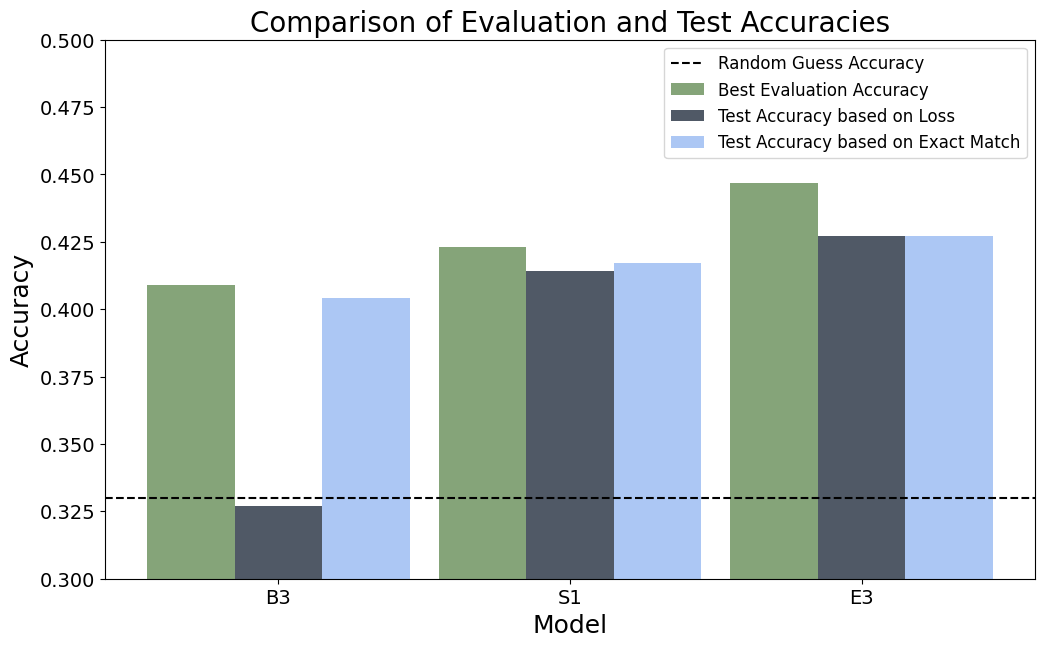

In [269]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 7))
index = range(len(df_graph1))
bar_width = 0.3
opacity = 0.8


rects1 = ax.bar([p - bar_width/2 for p in index], df_graph1['Best Eval Accuracy'], bar_width, alpha=opacity, color=aspargus, label='Best Evaluation Accuracy')
rects2 = ax.bar([p + bar_width/2 for p in index], df_graph1['Test Accuracy based on loss'], bar_width, alpha=opacity, color=metal, label='Test Accuracy based on Loss')
rects3 = ax.bar([p + bar_width*1.5 for p in index], df_graph1['Test Accuracy based on Exact Match'], bar_width, alpha=opacity, color=jordy, label='Test Accuracy based on Exact Match')





ax.axhline(y=0.33, color='k', linestyle='--', label='Random Guess Accuracy')
# add label to the line
# ax.text(1, 0.33, f"Random: 0.33", fontsize=12, ha='right', va='bottom')

# make y axis start at 0.33
plt.ylim(0.3, 0.5)
ax.set_xlabel('Model', fontsize=18)
ax.set_ylabel('Accuracy', fontsize=18)
ax.set_title('Comparison of Evaluation and Test Accuracies', fontsize=20)
ax.set_xticks([p + bar_width /2 for p in index])
ax.set_xticklabels(df_graph1["Name"])
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelrotation=0, labelsize=14)
# ax.legend(loc='lower left')
ax.legend(loc='upper right', fontsize=12)

plt.show()

# Graph 2 Timelines of Eval Accuracy


In [259]:
# create_timeline(df_bl['local_metrics_path'], df_bl['Name'])
# df_mANLI_v1
# create_timeline(df_mANLI_v1['local_metrics_path'], df_mANLI_v1['Name'])
# create_timeline(df_mANLI_v2['local_metrics_path'], df_mANLI_v2['Name'])

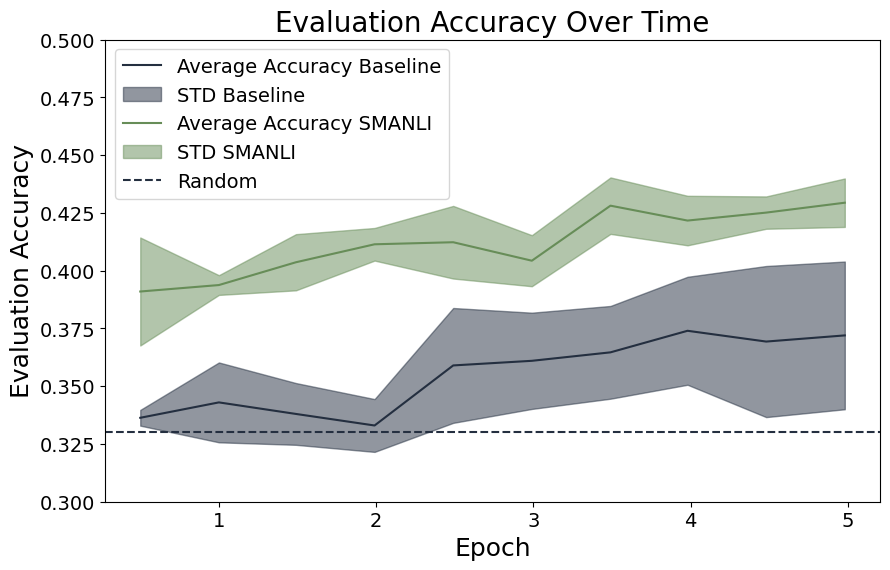

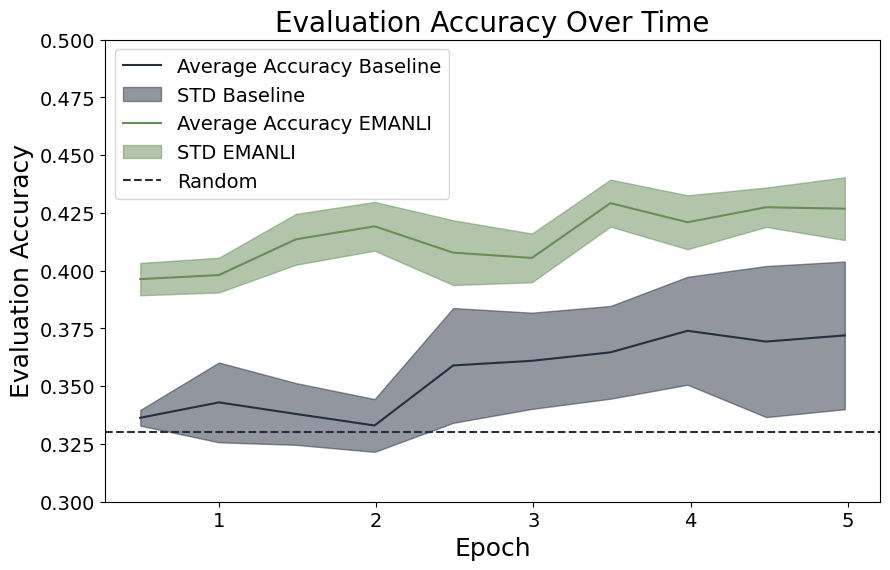

In [260]:
create_timeline_mean_and_std_shaded_with_baseline(df_bl['local_metrics_path'], df_mANLI_v1['local_metrics_path'], "SMANLI")
create_timeline_mean_and_std_shaded_with_baseline(df_bl['local_metrics_path'], df_mANLI_v2['local_metrics_path'], "EMANLI")

In [241]:
create_timeline_mean_and_std_shaded(df_bl['local_metrics_path'], df_mANLI_v1['local_metrics_path'], df_mANLI_v2['local_metrics_path'])

TypeError: create_timeline_mean_and_std_shaded() takes 1 positional argument but 3 were given

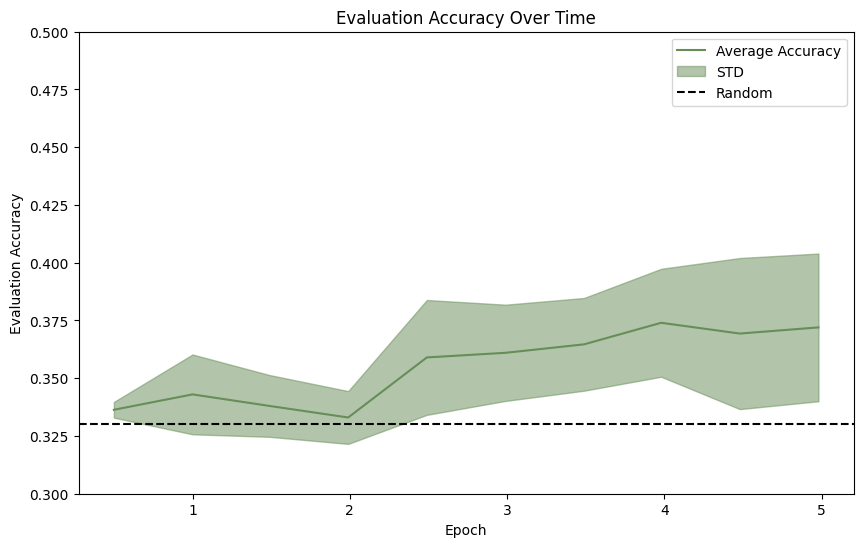

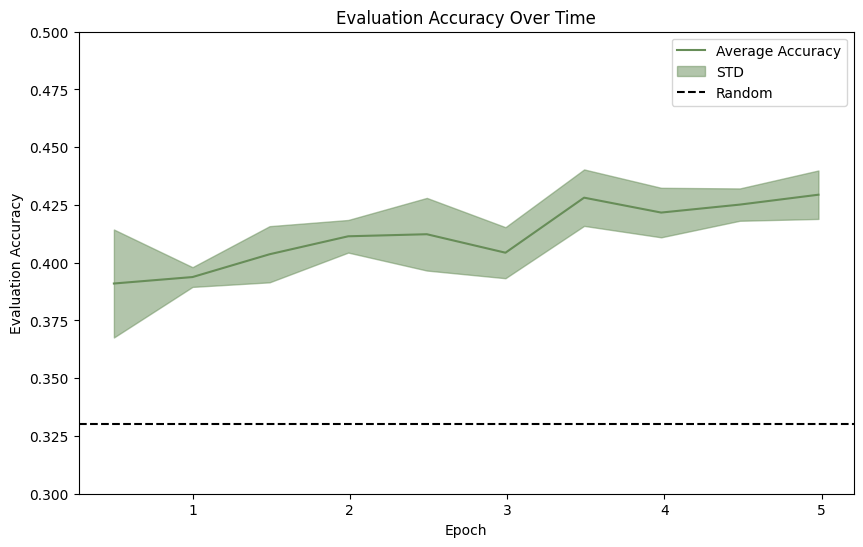

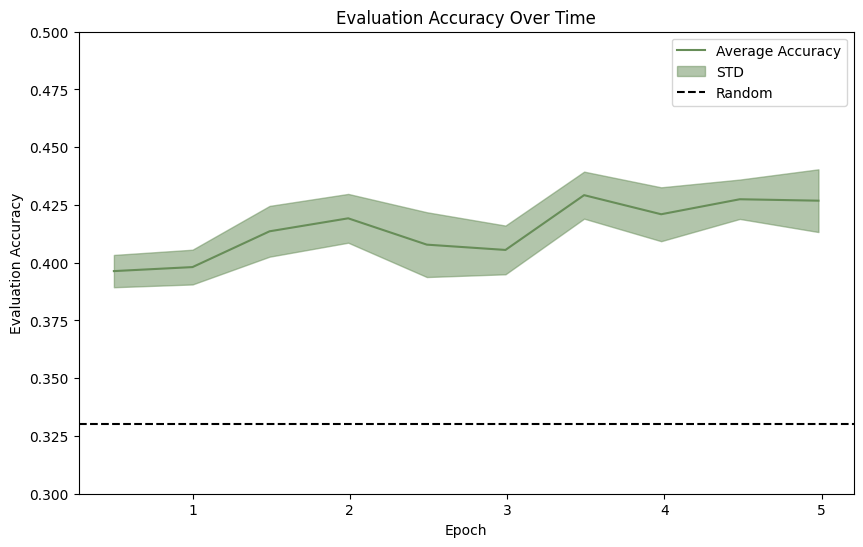

In [ ]:
create_timeline_mean_and_std_shaded(df_bl['local_metrics_path'])
create_timeline_mean_and_std_shaded(df_mANLI_v1['local_metrics_path'])
create_timeline_mean_and_std_shaded(df_mANLI_v2['local_metrics_path'])

# Future Research! above
few-shot approach of the first entries for both the EMANLI as well as SMANLI dataset much higher than the original classification dataset

# Graph 3 
average difference between test accuracy and best match accuracy

5.033333333333334
-0.17777777777777612
-0.5111111111111066


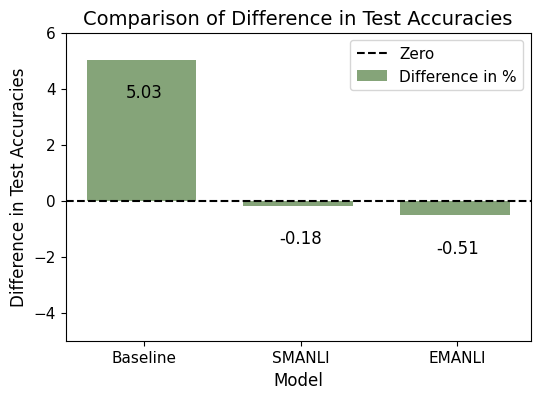

In [267]:
# get average of diff test accuracies for each type in positive

print(df_bl['Diff Test Accuracies'].mean())
print(df_mANLI_v1['Diff Test Accuracies'].mean())
print(df_mANLI_v2['Diff Test Accuracies'].mean())
# plot this 
fig, ax = plt.subplots(figsize=(6, 4))
index = range(3)
bar_width = 0.7
opacity = 0.8

rects1 = ax.bar([p - bar_width/40 for p in index], [df_bl['Diff Test Accuracies'].mean(), df_mANLI_v1['Diff Test Accuracies'].mean(), df_mANLI_v2['Diff Test Accuracies'].mean()], bar_width, alpha=opacity, color=aspargus, label='Difference in %')

ax.axhline(y=0, color='k', linestyle='--', label='Zero')
# add label to the line
# ax.text(1, 0.33, f"Random: 0.33", fontsize=12, ha='right', va='bottom')

# add the values for each bar below the corresponding bar
for i, v in enumerate([df_bl['Diff Test Accuracies'].mean(), df_mANLI_v1['Diff Test Accuracies'].mean(), df_mANLI_v2['Diff Test Accuracies'].mean()]):
    ax.text(i, v - 1.5, f"{v:.2f}", fontsize=12, ha='center', va='bottom')

# make y axis start at 0.33
plt.ylim(-5, 6)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Difference in Test Accuracies', fontsize=12)
ax.set_title('Comparison of Difference in Test Accuracies', fontsize=14)
ax.set_xticks([p for p in index])
ax.set_xticklabels(["Baseline", "SMANLI", "EMANLI"])
ax.tick_params(axis='x', labelrotation=0)
ax.tick_params(axis='both', labelsize=11)
# ax.legend(loc='lower left')
ax.legend(loc='upper right', fontsize=11)

plt.show()


# Graph 4 
This graph shows the evolution of rational scores over time


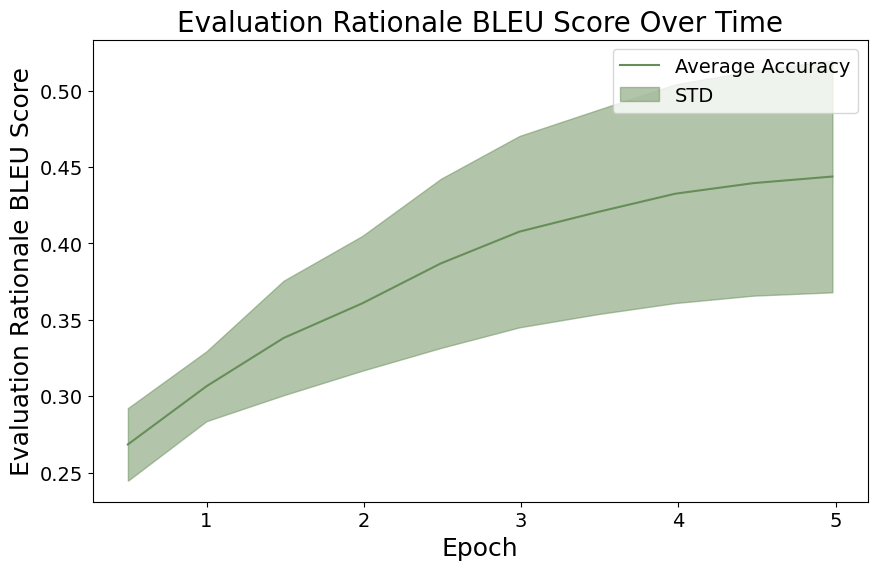

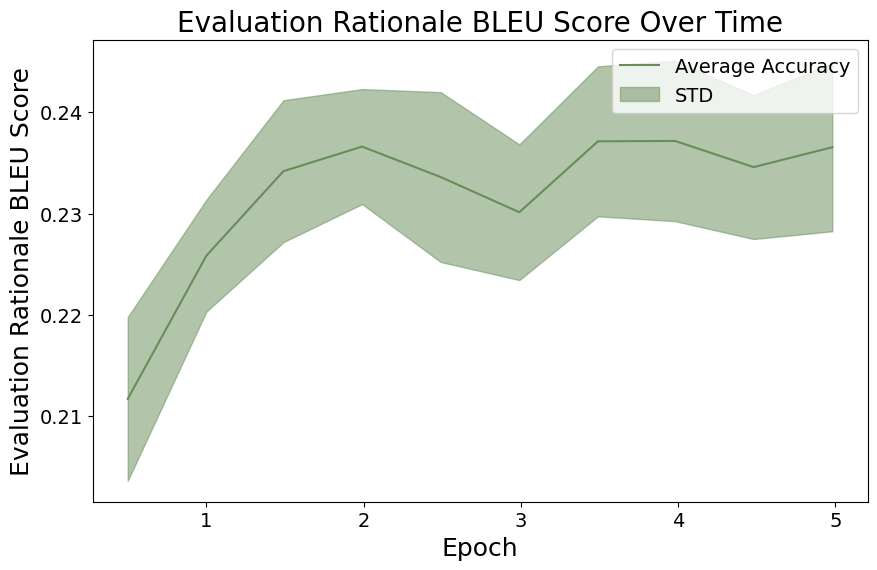

In [242]:
create_timeline_bleu_mean_and_std_shaded(df_mANLI_v1['local_metrics_path'])
create_timeline_bleu_mean_and_std_shaded(df_mANLI_v2['local_metrics_path'])

In [215]:
baseline_df = df[df['Type'] == 'baselines']
best_loss_accuracy = baseline_df['Test Accuracy based on loss'].max()
best_exact_match_accuracy = baseline_df['Test Accuracy based on Exact Match'].max()

print("Best Test Accuracy based on Loss:", best_loss_accuracy)
print("Best Test Accuracy based on Exact Match:", best_exact_match_accuracy)

best_overall_baseline = max(best_loss_accuracy, best_exact_match_accuracy)
print("Best Overall Baseline:", best_overall_baseline)



v1_df = df[df['Type'] == 'modified']
best_loss_accuracy = v1_df['Test Accuracy based on loss'].max()
best_exact_match_accuracy = v1_df['Test Accuracy based on Exact Match'].max()

print("Best Test Accuracy based on Loss:", best_loss_accuracy)
print("Best Test Accuracy based on Exact Match:", best_exact_match_accuracy)

best_overall_v1 = max(best_loss_accuracy, best_exact_match_accuracy)
print("Best Overall Baseline:", best_overall_v1)




v2_df = df[df['Type'] == 'modified_2']
best_loss_accuracy = v2_df['Test Accuracy based on loss'].max()
best_exact_match_accuracy = v2_df['Test Accuracy based on Exact Match'].max()

print("Best Test Accuracy based on Loss:", best_loss_accuracy)
print("Best Test Accuracy based on Exact Match:", best_exact_match_accuracy)

best_overall_v2 = max(best_loss_accuracy, best_exact_match_accuracy)
print("Best Overall Baseline:", best_overall_v2)


Best Test Accuracy based on Loss: 0.338
Best Test Accuracy based on Exact Match: 0.404
Best Overall Baseline: 0.404
Best Test Accuracy based on Loss: 0.414
Best Test Accuracy based on Exact Match: 0.417
Best Overall Baseline: 0.417
Best Test Accuracy based on Loss: 0.43
Best Test Accuracy based on Exact Match: 0.427
Best Overall Baseline: 0.43


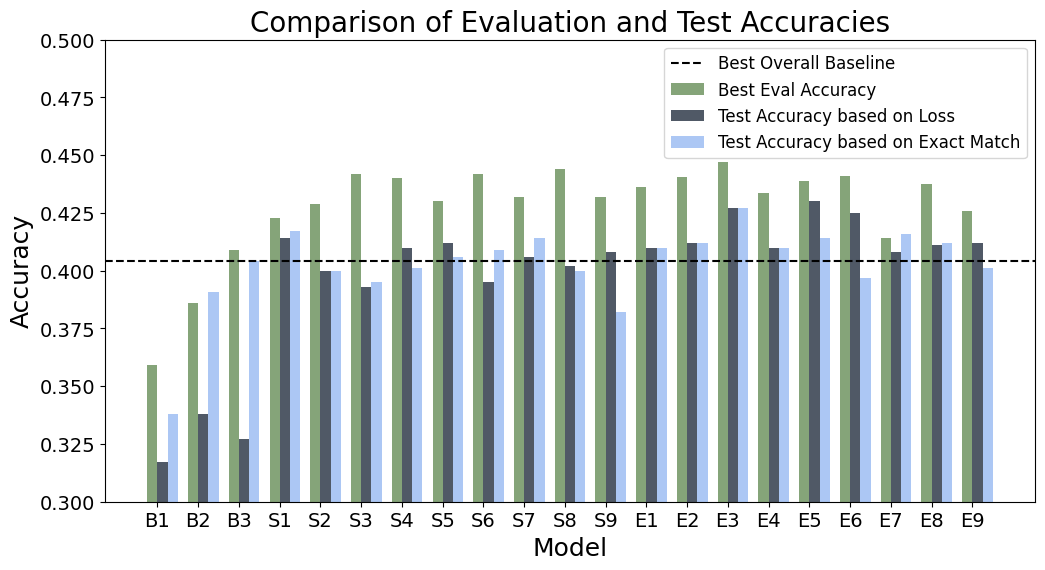

In [219]:
# plot using matplotlib: values should be results, Test Accuracy, Eval Accuracy based on Loss, X axis should be the file names
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))
index = range(len(all_files))
bar_width = 0.25
opacity = 0.8

rects1 = ax.bar(df['Name'], df['Best Eval Accuracy'], bar_width, alpha=opacity, color=aspargus, label='Best Eval Accuracy')
rects2 = ax.bar([p + bar_width for p in index], df['Test Accuracy based on loss'], bar_width, alpha=opacity, color=metal, label='Test Accuracy based on Loss')
rects3 = ax.bar([p + bar_width*2 for p in index], df['Test Accuracy based on Exact Match'], bar_width, alpha=opacity, color=jordy, label='Test Accuracy based on Exact Match')

ax.axhline(y=best_overall_baseline, color='k', linestyle='--', label='Best Overall Baseline')
# add label to the line
# ax.text(1.5, best_overall_baseline, f"Baseline: {best_overall_baseline}", fontsize=12, ha='right', va='bottom')


ax.set_ylim(0.3, 0.5)
ax.set_xlabel('Model', fontsize=18)
ax.set_ylabel('Accuracy', fontsize=18)
ax.set_title('Comparison of Evaluation and Test Accuracies', fontsize=20)
ax.set_xticks([p + bar_width /2 for p in index])
ax.set_xticklabels(df["Name"])
ax.tick_params(axis='x', labelrotation=0)
ax.tick_params(axis='both', labelsize=14)
ax.legend(loc='upper right', fontsize=12)

plt.show()
